In [2]:
# Make the following code support python2 and python3
from __future__ import division, print_function, unicode_literals

# Check if the version of python is 3.5 and above
import sys
assert sys.version_info >= (3, 5)
# Check to see if sklearn is version 0.20 and above
import sklearn
assert sklearn.__version__ >= "0.20"
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
import seaborn as sns
from matplotlib import cm
import scipy.stats as stats
from matplotlib.colors import Normalize
from scipy.interpolate import interpn
import matplotlib as mpl
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

plt.style.use('fast')
#plt.grid(False)
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)

# The result obtained after each run is the same as that of this notebook
np.random.seed(42)

# Setting the route to save the image
PROJECT_ROOT_DIR = "."
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGE_PATH, exist_ok=True)

# Setting the route to save the model
MODEL_PATH = os.path.join(PROJECT_ROOT_DIR, "models")
os.makedirs(MODEL_PATH, exist_ok=True)

# Setting the route to read the data set
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "dataset")


def save_fig(fig_id, tight_layout=True):
    '''
    Run to save automatic pictures
    
    :param fig_id: image name
    '''
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, **kwargs )

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')

    return ax

# suppress the warning caused by sklearn
import warnings

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel("datasets/Training_model_2.xlsx")
df.head()
df  = df.drop(['CITATIONS',	'LATITUDE',	'LONGITUDE',	'SAMPLE NAME','Rb/Sr','LaYbn'], axis = 1)
#df  = df.drop('Label2', axis = 1)
df.head()

,Label,crust_thickness,SIO2(WT%),TIO2(WT%),AL2O3(WT%),FEOT(WT%),CAO(WT%),MGO(WT%),MNO(WT%),K2O(WT%),NA2O(WT%),P2O5(WT%),CR(PPM),NI(PPM),RB(PPM),SR(PPM),Y(PPM),ZR(PPM),NB(PPM),BA(PPM),LA(PPM),CE(PPM),PR(PPM),ND(PPM),SM(PPM),EU(PPM),GD(PPM),TB(PPM),DY(PPM),ER(PPM),YB(PPM),LU(PPM),HF(PPM),TH(PPM),Ln(lAYbn),Sr/Y
0,3,25.570,59.702065,1.458461,15.862021,7.031831,4.653029,2.020201,0.170487,1.122293,6.015838,0.456267,1.1964,1.3958,16.0,310.0,50.5479,335.989,11.1664,178.83454,20.482725,49.901815,6.997974,30.9,8.239798,2.461873,8.830307,1.507821,9.519362,5.387897,4.998533,0.783026,7.709839,2.73459,1.023782,6.132797
1,3,27.210,62.570000,1.210000,15.260000,6.450000,3.630000,1.240000,0.220000,1.210000,6.440000,0.300000,9.0000,4.0000,21.0,260.0,66.0000,496.000,14.0000,200.00000,28.000000,61.500000,NaN,34.7,8.640000,2.360000,9.160000,NaN,9.740000,6.430000,6.120000,NaN,NaN,4.00000,1.133987,3.939394
2,4,32.375,64.360000,0.600000,16.540000,4.010000,4.930000,2.090000,0.090000,2.040000,4.200000,0.240000,38.0000,NaN,57.0,470.0,8.0000,141.000,5.0000,449.00000,28.500000,58.800000,NaN,19.5,3.400000,1.400000,NaN,0.770000,NaN,NaN,1.200000,0.250000,4.100000,11.60000,2.780927,58.750000
3,4,32.375,62.350000,0.790000,16.610000,5.430000,5.710000,2.870000,0.090000,2.090000,4.170000,0.230000,28.0000,19.0000,57.0,511.0,15.0000,149.000,10.0000,447.00000,29.600000,59.700000,NaN,20.0,4.000000,1.100000,NaN,0.660000,NaN,NaN,1.320000,0.220000,4.100000,10.40000,2.723487,34.066667
4,4,32.375,62.040000,0.790000,16.590000,5.460000,5.720000,2.910000,0.090000,2.160000,4.110000,0.250000,26.0000,18.0000,63.0,463.0,16.0000,150.000,11.0000,444.00000,29.300000,60.100000,NaN,21.1,4.000000,1.100000,NaN,0.470000,NaN,NaN,1.540000,0.190000,4.600000,10.70000,2.559149,28.937500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2663 entries, 0 to 2662
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Label            2663 non-null   int64  
 1   crust_thickness  2663 non-null   float64
 2   SIO2(WT%)        2663 non-null   float64
 3   TIO2(WT%)        2663 non-null   float64
 4   AL2O3(WT%)       2663 non-null   float64
 5   FEOT(WT%)        2663 non-null   float64
 6   CAO(WT%)         2663 non-null   float64
 7   MGO(WT%)         2663 non-null   float64
 8   MNO(WT%)         2663 non-null   float64
 9   K2O(WT%)         2663 non-null   float64
 10  NA2O(WT%)        2663 non-null   float64
 11  P2O5(WT%)        2663 non-null   float64
 12  CR(PPM)          2313 non-null   float64
 13  NI(PPM)          2331 non-null   float64
 14  RB(PPM)          2663 non-null   float64
 15  SR(PPM)          2663 non-null   float64
 16  Y(PPM)           2663 non-null   float64
 17  ZR(PPM)       

In [6]:
#count the .percentage of Nan
df.isnull().sum().sum() /(df.shape[0]* df.shape[1])

0.055159177201986063

# Split Train and Test data

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
def train_test_sp(data, target, test_size):
    """
    Simple stratified sampling
    based sklearn.model_selection.StratifiedShuffleSplit
    param data: data
    param target: the label 
    """
    splitned = StratifiedShuffleSplit(n_splits= 1, test_size = test_size, random_state = 50)
    for train_index, test_index in splitned.split(data, data[target]):
        strat_train_set = data.loc[train_index]
        strat_test_set = data.loc[test_index]
    return  strat_train_set, strat_test_set

In [8]:
df.reset_index(drop=True, inplace=True)
train_set, test_set = train_test_sp(df, 'Label', 0.2)
X_train = train_set.drop(columns=['crust_thickness', 'Label'])
X_test = test_set.drop(columns=['crust_thickness', 'Label'])
y_train = train_set['crust_thickness']
y_test = test_set['crust_thickness']
title = X_test

In [9]:
from sklearn import preprocessing
def data_process(X,choice):
    if choice==0:
        X=preprocessing.RobustScaler().fit_transform(X)
    elif choice==1:
        X=preprocessing.MinMaxScaler().fit_transform(X)
    elif choice==2:
        X=preprocessing.StandardScaler().fit_transform(X)
    elif choice==3:
        X=preprocessing.PowerTransformer().fit_transform(X)
    elif choice==-1:
        X=X
    return X

In [10]:
X_train = pd.DataFrame(data_process(np.array(X_train), 3))
X_test = pd.DataFrame(data_process(np.array(X_test), 3))

# XGboost

In [20]:
import xgboost
from sklearn.utils.fixes import loguniform
xgb = xgboost.XGBRegressor()

In [12]:
# colsample_bytree = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# boost_params = ["gblinear", "gbtree"]
# base_score =np.arange(0,0.5,0.1)
# max_depth = [2,3,4,5,6,7,8,9]
# learning_rate=np.arange(0.05,0.2,0.01)
# min_child_weight = np.arange(40,300,50)
# n_estimators = [100,150,200,250,300,350,400,500,600]


# params = {
#     "colsample_bytree":colsample_bytree,
#     "boost_params":boost_params,
#     "max_depth":max_depth,
#     "learning_rate":learning_rate,
#     "min_child_weight":min_child_weight,
#     "n_estimators":n_estimators,
#     "base_score":base_score
# }

# #xgb_opt = GridSearchCV(xgb, param_grid = params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1 )
# xgb_opt = RandomizedSearchCV(xgb, param_distributions=params, cv=5, scoring='r2', n_jobs=-1, n_iter=200, random_state=545)
# xgb_fit = xgb_opt.fit(X_train, y_train)


In [ ]:
# xgb_opt.best_estimator_

In [13]:
# xgb_best_model = xgb_opt.best_estimator_
# cv_results = pd.DataFrame(xgb_fit.cv_results_)
# cv_results = cv_results.sort_values('rank_test_score')
# cv_results

In [14]:
colsample_bytree = [0.5]
boost_params = ["gbtree"]
base_score =[0.3]
max_depth = [5]
learning_rate=[0.1]
min_child_weight = [100]
n_estimators = [250]


params = {
    "colsample_bytree":colsample_bytree,
    "boost_params":boost_params,
    "max_depth":max_depth,
    "learning_rate":learning_rate,
    "min_child_weight":min_child_weight,
    "n_estimators":n_estimators,
    "base_score":base_score
}

#xgb_opt = GridSearchCV(xgb, param_grid = params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1 )
xgb_opt = RandomizedSearchCV(xgb, param_distributions=params, cv=5, scoring='r2', n_jobs=-1, n_iter=200, random_state=2022)
xgb_fit = xgb_opt.fit(X_train, y_train)
cv_results=pd.DataFrame(xgb_fit.cv_results_)
cv_results

[11:13:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "boost_params" } are not used.



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_colsample_bytree,param_boost_params,param_base_score,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.95495,0.005515,0.0056,0.00049,250,100,5,0.1,0.5,gbtree,0.3,"{'n_estimators': 250, 'min_child_weight': 100,...",0.807034,0.790614,0.831388,0.84759,0.803889,0.816103,0.020524,1


In [16]:
xgb_opt.best_estimator_

XGBRegressor(base_score=0.3, boost_params='gbtree', booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=100, missing=nan, monotone_constraints=None,
             n_estimators=250, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [22]:
xgb_reg = xgb_opt.best_estimator_
y_xgb = xgb_opt.best_estimator_.predict(X_test)
y_xgb_train = xgb_opt.best_estimator_.predict(X_train)


In [28]:
xgb_reg = xgboost.XGBRegressor(base_score=0.3, boost_params='gbtree', booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=100, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              predictor=None,)

# save model
import pickle

# Save the trained model
with open('models/crust_thickness_xgboost_regression_model2.0.pkl', 'wb') as f:
    pickle.dump(xgb_reg.fit(X_train, y_train), f)

[11:23:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "boost_params" } are not used.



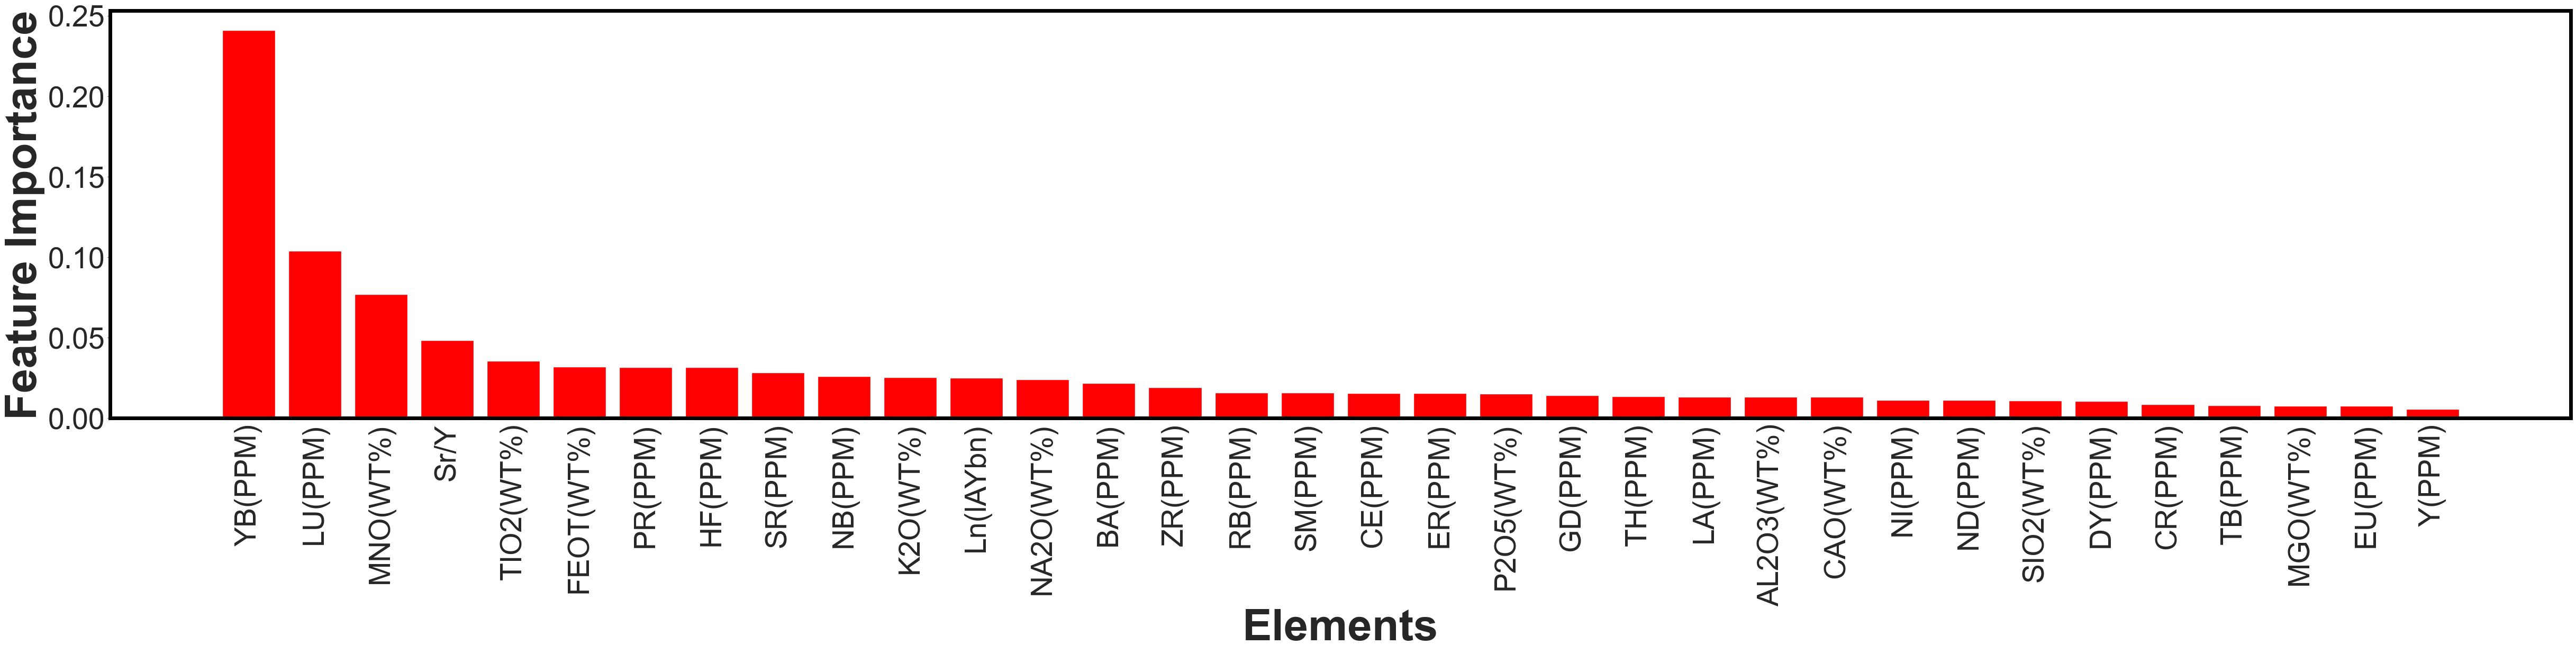

In [13]:
c={"feature" : title.columns,
   "importance" : xgb_reg.feature_importances_}#将列表a，b转换成字典
df_importance=pd.DataFrame(c)#将字典转换成为数据框
df_importance = df_importance.sort_values('importance',ascending=False)
df_importance
plt.figure(figsize=(60, 10))
# 柱状图显示xgBOOST预测的特征的权重
plt.bar(range(len(df_importance)), df_importance['importance'], tick_label=df_importance['feature'] , color = 'r' )

plt.tick_params(labelsize=40)
plt.xticks(rotation=90)
plt.ylabel('Feature Importance',fontsize=60,fontweight='bold')
plt.xlabel('Elements',fontsize=60,fontweight='bold')
plt.grid(False)
ax = plt.gca()

for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(5)

#ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
#save_fig("rnd_feature_importance")

In [14]:
y_xgb = xgb_reg.fit(X_train, y_train).predict(X_test)
y_xgb_train = xgb_reg.fit(X_train, y_train).predict(X_train)

[11:19:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "boost_params" } are not used.
[11:19:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "boost_params" } are not used.


The absolute error for the XGBOOST Model : 3.2010659581769474
The mean squared error for the XGBOOST Model : 4.730586550952648
The R2-score for the XGBOOST Model : 0.8408836229898875


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


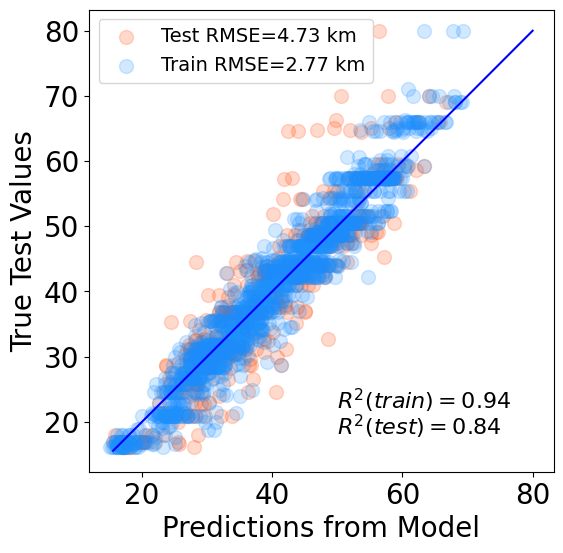

In [23]:
MAE = mean_absolute_error(y_test, y_xgb)
MSE = mean_squared_error(y_test, y_xgb)
R2_xg = r2_score(y_test, y_xgb)
RMSE = np.sqrt(MSE)

MAE2 = mean_absolute_error(y_train, y_xgb_train)
MSE2 = mean_squared_error(y_train, y_xgb_train)
R2_xg2 = r2_score(y_train, y_xgb_train)
RMSE2 = np.sqrt(MSE2)


print("The absolute error for the XGBOOST Model :", MAE)
print("The mean squared error for the XGBOOST Model :", RMSE)
print("The R2-score for the XGBOOST Model :", R2_xg)
plt.figure(figsize = (6,6))
#plt.scatter(y_test, y_xgb, color = 'brown')
#plt.scatter(y_train, y_xgb_train, color = 'lightyellow')
#plt.xlabel('True Test Values')
#plt.ylabel('Predictions from Model')

p1 = max(max(y_xgb), max(y_test))
p2 = min(min(y_xgb), min(y_test))
plt.plot([p1, p2], [p1, p2], 'blue')
# plt.yscale([0,80])
# plt.xscale([0,80])
plt.ylabel('True Test Values', fontsize=20)
plt.xlabel('Predictions from Model', fontsize=20)
text_position=[50, 20]
plt.scatter( y_xgb, y_test,s = 100, marker="o", c = 'orangered' ,
             label="Test RMSE={:.2f} km".format(RMSE),alpha = 0.2)
plt.scatter( y_xgb_train,y_train,s = 100,  marker="o", c = 'dodgerblue',
             label="Train RMSE={:.2f} km".format(RMSE2),alpha = 0.2)

plt.legend(loc="upper left", fontsize=14)
plt.text(text_position[0], text_position[1]-2,
         r'$R^2(test)=${:.2f} '.format(R2_xg),
         fontdict={'size': 16, 'color': '#000000'})
plt.text(text_position[0], text_position[1]+2,
         r'$R^2(train)=${:.2f} '.format(R2_xg2),
         fontdict={'size': 16, 'color': '#000000'})
#plt.title('Xgboost model with Gangdese this study', fontsize=20)
y_test1 = y_test.values
plt.grid(False)
plt.savefig('Train and testmodel 2.eps' ,format = 'eps')


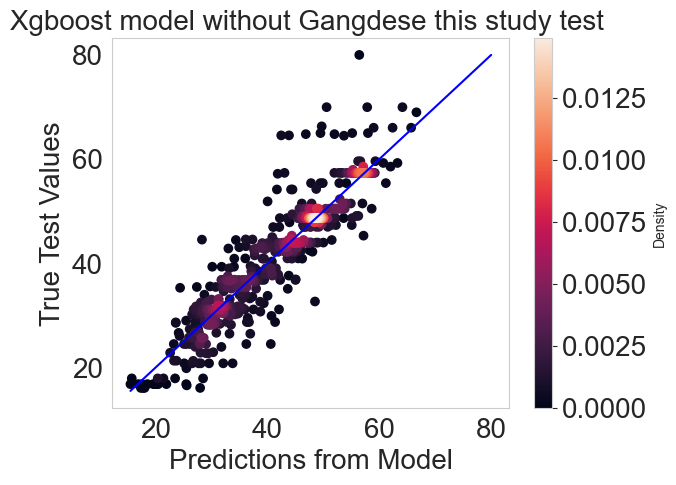

In [16]:
y_test1 = y_test.values
density_scatter( y_xgb, y_test1, bins = [30,30] )
plt.plot([p1, p2], [p1, p2], 'blue')
plt.title('Xgboost model without Gangdese this study test ', fontsize=20)
plt.ylabel('True Test Values', fontsize=20)
plt.xlabel('Predictions from Model', fontsize=20)
plt.grid(False)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


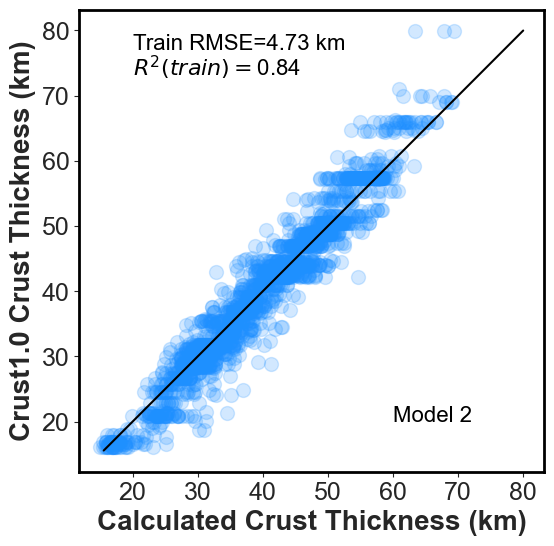

In [17]:
plt.figure(figsize = (6,6))
p1 = max(max(y_xgb), max(y_test))
p2 = min(min(y_xgb), min(y_test))
plt.plot([p1, p2], [p1, p2], 'black')
# plt.yscale([0,80])
# plt.xscale([0,80])
plt.ylabel('Crust1.0 Crust Thickness (km)', fontsize=20,fontweight='bold')
plt.xlabel('Calculated Crust Thickness (km)', fontsize=20,fontweight='bold')
text_position=[60, 20]
text_position2=[20, 75]
# plt.scatter( y_xgb, y_test,s = 100, marker="o", c = 'orangered' ,
#             label="Test RMSE={:.2f} km".format(RMSE),alpha = 0.2)
plt.scatter( y_xgb_train,y_train,s = 100,  marker="o", c = 'dodgerblue',
             label="Train RMSE={:.2f} km".format(RMSE2),alpha = 0.2)

#plt.legend(loc="upper left", fontsize=16)
plt.text(text_position2[0], text_position2[1]+2,
         r'Train RMSE={:.2f} km'.format(RMSE2),
         fontdict={'size': 16, 'color': '#000000'})
plt.text(text_position2[0], text_position2[1]-2,
         r'$R^2(train)=${:.2f} '.format(R2_xg2),
         fontdict={'size': 16, 'color': '#000000'})
plt.text(text_position[0], text_position[1],
         r'Model 2 ',
         fontdict={'size': 16, 'color': '#000000'})
plt.tick_params(labelsize=18)
plt.yticks(np.arange(20, 89, step=10))
plt.xticks(np.arange(20,89,step=10))
#plt.title('Xgboost model with Gangdese this study', fontsize=20)
y_test1 = y_test.values
plt.grid(False)
ax = plt.gca()

for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(2)

ax.xaxis.set_ticks_position('bottom')  
ax.yaxis.set_ticks_position('left')    
plt.savefig('Train.eps' ,format = 'eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


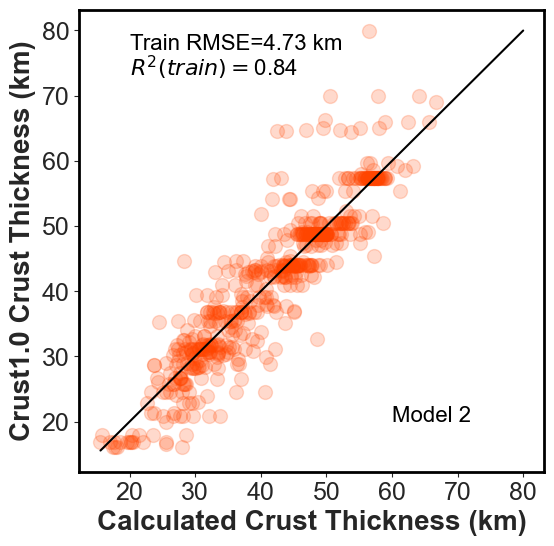

In [19]:
plt.figure(figsize = (6,6))

p1 = max(max(y_xgb), max(y_test))
p2 = min(min(y_xgb), min(y_test))
plt.plot([p1, p2], [p1, p2], 'black')

plt.ylabel('Crust1.0 Crust Thickness (km)', fontsize=20,fontweight='bold')
plt.xlabel('Calculated Crust Thickness (km)', fontsize=20,fontweight='bold')
text_position=[60, 20]
text_position2=[20, 75]
plt.scatter( y_xgb, y_test,s = 100, marker="o", c = 'orangered' ,
             label="Test RMSE={:.2f} km".format(RMSE),alpha = 0.2)
#plt.legend(loc="upper left", fontsize=16)
plt.text(text_position2[0], text_position2[1]+2,
         r'Train RMSE={:.2f} km'.format(RMSE),
         fontdict={'size': 16, 'color': '#000000'})
plt.text(text_position2[0], text_position2[1]-2,
         r'$R^2(train)=${:.2f} '.format(R2_xg),
         fontdict={'size': 16, 'color': '#000000'})
plt.text(text_position[0], text_position[1],
         r'Model 2 ',
         fontdict={'size': 16, 'color': '#000000'})

#plt.title('Xgboost model with Gangdese this study', fontsize=20)
#plt.tick_params(labelsize=12)
plt.tick_params(labelsize=18)
plt.yticks(np.arange(20, 89, step=10))
plt.xticks(np.arange(20,89,step=10))
#plt.title('Xgboost model with Gangdese this study', fontsize=20)
y_test1 = y_test.values
plt.grid(False)
ax = plt.gca()

for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(2)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.savefig(' test.eps' ,format = 'eps')
plt.show()

In [ ]:
y_train_error = y_xgb_train - y_train
y_test_error = y_xgb - y_test
plt.figure(figsize = (6,6))
plt.hist(y_train_error, bins = 15, color = 'dodgerblue', alpha=.8  , label = 'Train error')
plt.hist(y_test_error, bins = 20, color ='orangered' , alpha=.7 , label = 'Test error')
plt.legend(loc='upper right')
plt.ylabel('Numbers', fontsize=20,fontweight='bold')
plt.xlabel('Errors of Crust Thickness (km)', fontsize=20,fontweight='bold')
plt.grid(False)


plt.grid(False)
ax = plt.gca()

for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(2)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.savefig('error.eps' ,format = 'eps')
plt.show()

50% Confidence Interval: [-1.96581192  2.14789597]
90% Confidence Interval: [-7.35682126  7.06196704]
95% Confidence Interval: [-11.56394756   8.72138774]
98% Confidence Interval: [-16.46568093  11.80868249]


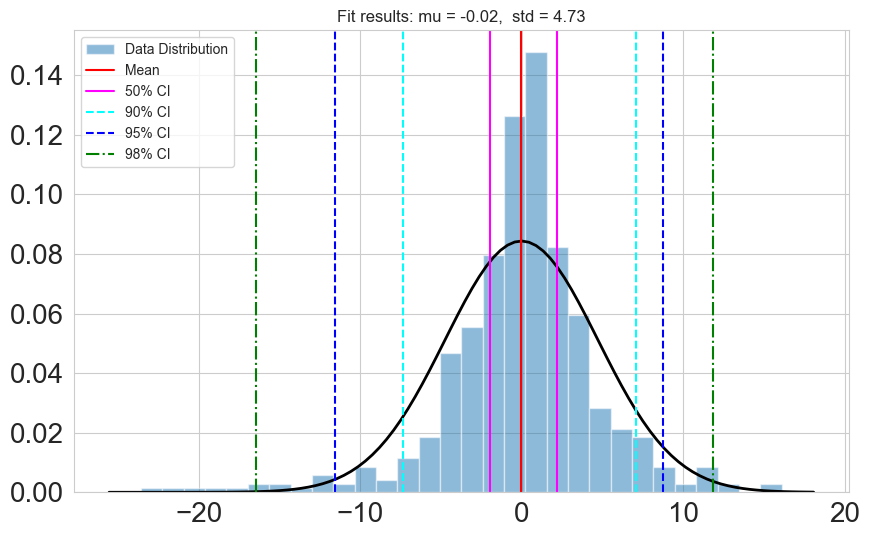

In [56]:
data = y_test_error
# Calculate statistics
mean = np.mean(data)
std_dev = np.std(data)

# Confidence intervals using the percentile method
ci_95 = np.percentile(data, [2.5, 97.5])
ci_98 = np.percentile(data, [1, 99])
ci_90 = np.percentile(data, [5, 95])
ci_50 = np.percentile(data, [25, 75])

# Print the confidence intervals
print("50% Confidence Interval:", ci_50)
print("90% Confidence Interval:", ci_90)
print("95% Confidence Interval:", ci_95)
print("98% Confidence Interval:", ci_98)

# Plotting
plt.figure(figsize=(10, 6))

# Histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.5, label='Data Distribution')

# Overlay the PDF of the normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)

# Add vertical lines for the confidence intervals
plt.axvline(mean, color='red', linestyle='-', label='Mean')
plt.axvline(ci_50[0], color='magenta', linestyle='-', label='50% CI')
plt.axvline(ci_50[1], color='magenta', linestyle='-')
plt.axvline(ci_90[0], color='cyan', linestyle='--', label='90% CI')
plt.axvline(ci_90[1], color='cyan', linestyle='--')
plt.axvline(ci_95[0], color='blue', linestyle='--', label='95% CI')
plt.axvline(ci_95[1], color='blue', linestyle='--')
plt.axvline(ci_98[0], color='green', linestyle='-.', label='98% CI')
plt.axvline(ci_98[1], color='green', linestyle='-.')

tit = "Fit results: mu = %.2f,  std = %.2f" % (mean, std_dev)
plt.title(tit)
plt.legend()
# 获取当前的坐标轴对象
ax = plt.gca()

# 设置边框颜色为黑色
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(2)

# 显示刻度
ax.xaxis.set_ticks_position('bottom')  # 显示x轴刻度
ax.yaxis.set_ticks_position('left')    # 显示y轴刻度
plt.grid(False)
plt.show()

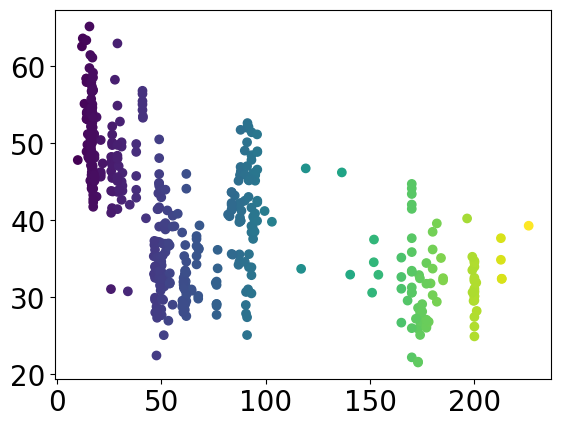

In [27]:

datao = pd.read_excel("datasets/Gangdese_Datasets.xlsx")
age = datao['Age']
data = datao.drop(['Data source', 'Lat', 'Long', 'sample', 'Age', 'Rb/Sr', 'La/Yb(n)'], axis=1)

#data.head()
#data2 = data.drop(['Year','CITATION','SAMPLE NAME','ROCK TYPE'], axis=1)
datast = pd.DataFrame(data_process(np.array(data), 3))
data_xgb_total = xgb_opt.best_estimator_.predict(datast)
data_xgb_total = pd.DataFrame(data_xgb_total)
datao['crust_thickness'] = data_xgb_total
datao.to_excel('outputs/Validation_NorthChinaCraton_model2.xlsx')
plt.scatter(age, data_xgb_total, c=age)